# Network Plot for top 100 Indication-Phytochemical Relationships
#### Author: Shuchen Zhang & Bhavika Berwal

## String Map

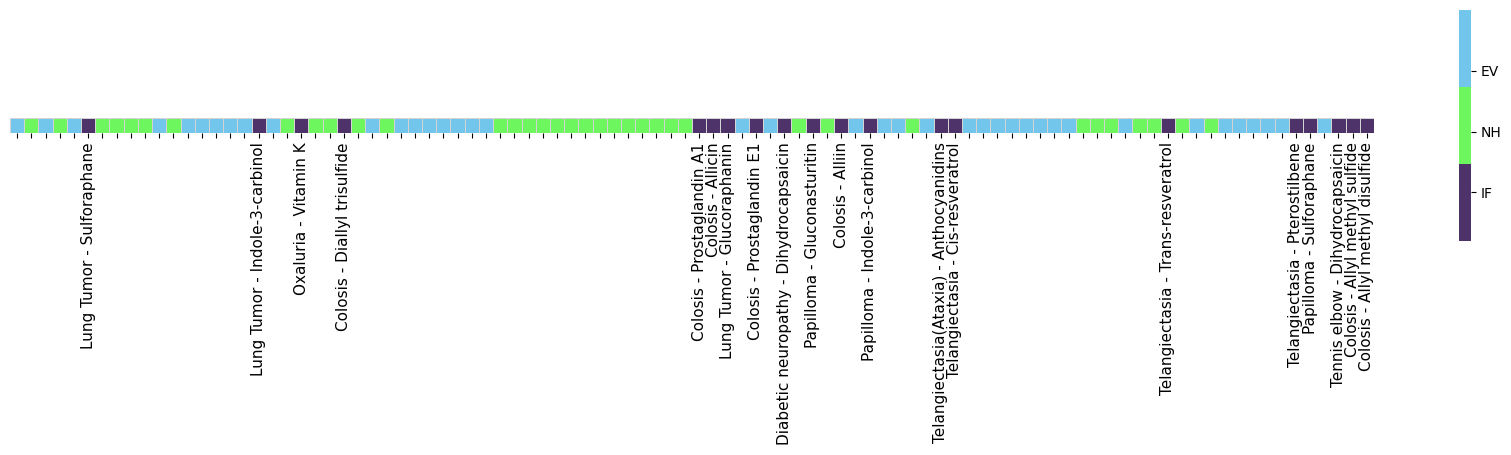

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Read and process data
num_pairs = 96
data = pd.read_csv('../Data/Supplementary.csv')
indics = data['Indication'][:num_pairs]
phyto = data['Phytochemical'][:num_pairs]
labels = list(data['Inference_EV_NH_IF'][:96])

# Create values and labels
vals = []
tick_labels = []
for i, label in enumerate(labels):
    if label == 'EV':
        val = 20
    elif label == 'NH':
        val = 10
    elif label == 'IF':
        val = 1
    vals.append(val)
    tick_labels.append(f'{indics[i]} - {phyto[i]}')

# Create plot
fig, ax = plt.subplots()
fig.set_size_inches(22, 3)

# Define colors for EV, NH, IF
myColors = [
    (34/255, 0/255, 69/255, 0.8),     # Dark purple for EV
    (94/255, 245/255, 78/255, 0.9),   # Bright green for NH
    (20/255, 161/255, 222/255, 0.6)   # Light blue for IF
]

cmap = ListedColormap(myColors)
sns.heatmap([vals], cmap=cmap, linewidths=0.5, linecolor='lightgray', 
            square=True, yticklabels=False, ax=ax)
ax.set_xticklabels(tick_labels, fontsize=11, rotation=90)

# Show only IF labels
xticks = ax.xaxis.get_major_ticks()
for i in range(num_pairs):
    if labels[i] != 'IF':
        xticks[i].label1.set_visible(False)
        xticks[i].label2.set_visible(False)

# Set colorbar labels to match your data
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([5, 10, 15])  # Adjusted for your value range (1, 10, 20)
colorbar.set_ticklabels(['IF', 'NH', 'EV'])

plt.savefig('../Figures/indic_phyto_stackbar.png', dpi=300, bbox_inches="tight")
plt.show()

## Sankey Diagram

In [2]:
import pandas as pd
data = pd.read_csv("../Data/Supplementary.csv")

# Define the desired order for 'Inference_EV_NH_IF'
inference_order = ["EV", "NH", "IF"]

# Convert 'Inference_EV_NH_IF' to a categorical type with the specified order
data['Inference_EV_NH_IF'] = pd.Categorical(data['Inference_EV_NH_IF'], categories=inference_order, ordered=True)
data_sorted = data.sort_values(by='Inference_EV_NH_IF')
data_sorted.to_csv("../Data/Derived_Data/Supplementary_sorted.csv", index=False)
print(data_sorted)


             Indication      Phytochemical Inference_EV_NH_IF  \
0            Andropause         Dianethole                 EV   
27     Oxalcrystalluria     Cucurbitacin D                 EV   
28     Oxalcrystalluria     Cucurbitacin I                 EV   
29     Oxalcrystalluria         Cucurbitin                 EV   
30         Tennis elbow          Capsidiol                 EV   
..                  ...                ...                ...   
48              Colosis   Prostaglandin A1                 IF   
56            Papilloma    Gluconasturitin                 IF   
54  Diabetic neuropathy   Dihydrocapsaicin                 IF   
17           Lung Tumor  Indole-3-carbinol                 IF   
49              Colosis            Allicin                 IF   

    specificity_score  
0            0.500000  
27           0.333333  
28           0.333333  
29           0.333333  
30           0.333333  
..                ...  
48           0.250000  
56           0.250000  
54 

In [3]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import os

# Install kaleido directly in the script if it's missing
os.system("pip install -U kaleido")

data = pd.read_csv('../Data/Supplementary_sorted.csv')

indications = list(data['Indication'].unique())
phytochemicals = list(data['Phytochemical'].unique())

node_labels = [f'<b style="font-size: 16px;">{ind}</b>' for ind in indications] + \
              [f'<b style="font-size: 12px;">{phy}</b>' for phy in phytochemicals]

sources = []
targets = []
values = []
colors = []

color_map = {
    'IF': 'rgba(255, 0, 0, 0.4)',  # Red
    'EV': 'rgba(0, 0, 255, 0.4)',  # Blue 
    'NH': 'rgba(0, 255, 0, 0.4)'   # Green 
}

# Create all connections
for idx, row in data.iterrows():
    source_idx = indications.index(row['Indication'])
    target_idx = len(indications) + phytochemicals.index(row['Phytochemical'])
    
    sources.append(source_idx)
    targets.append(target_idx)
    values.append(row['specificity_score'] * 100)
    colors.append(color_map[row['Inference_EV_NH_IF']])

# Create custom node colors
node_colors = ['#1f77b4'] * len(indications) + ['#2ca02c'] * len(phytochemicals)

# Create the Sankey diagram with adjusted spacing
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 20,        # Increased padding between nodes
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = node_labels,
        color = node_colors
    ),
    link = dict(
        source = sources,
        target = targets,
        value = values,
        color = colors,
        hovertemplate = None
    ),
    arrangement = 'snap'  
)])

fig.update_layout(
    title=dict(
        y=0.98,          
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    font_size=14,
    height=900,       
    width=1000,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=80, b=20)  
)

fig.show()

try:
    fig.write_image("../Figures/sankey_diagram.png", scale=12)
    print("PNG file saved successfully")
except Exception as e:
    print(f"Error saving files: {str(e)}")

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Supplementary_sorted.csv'

## Network Map

/var/folders/b4/v914vnr53d78831b3prx5h680000gn/T/ipykernel_18857/1364748181.py:111: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


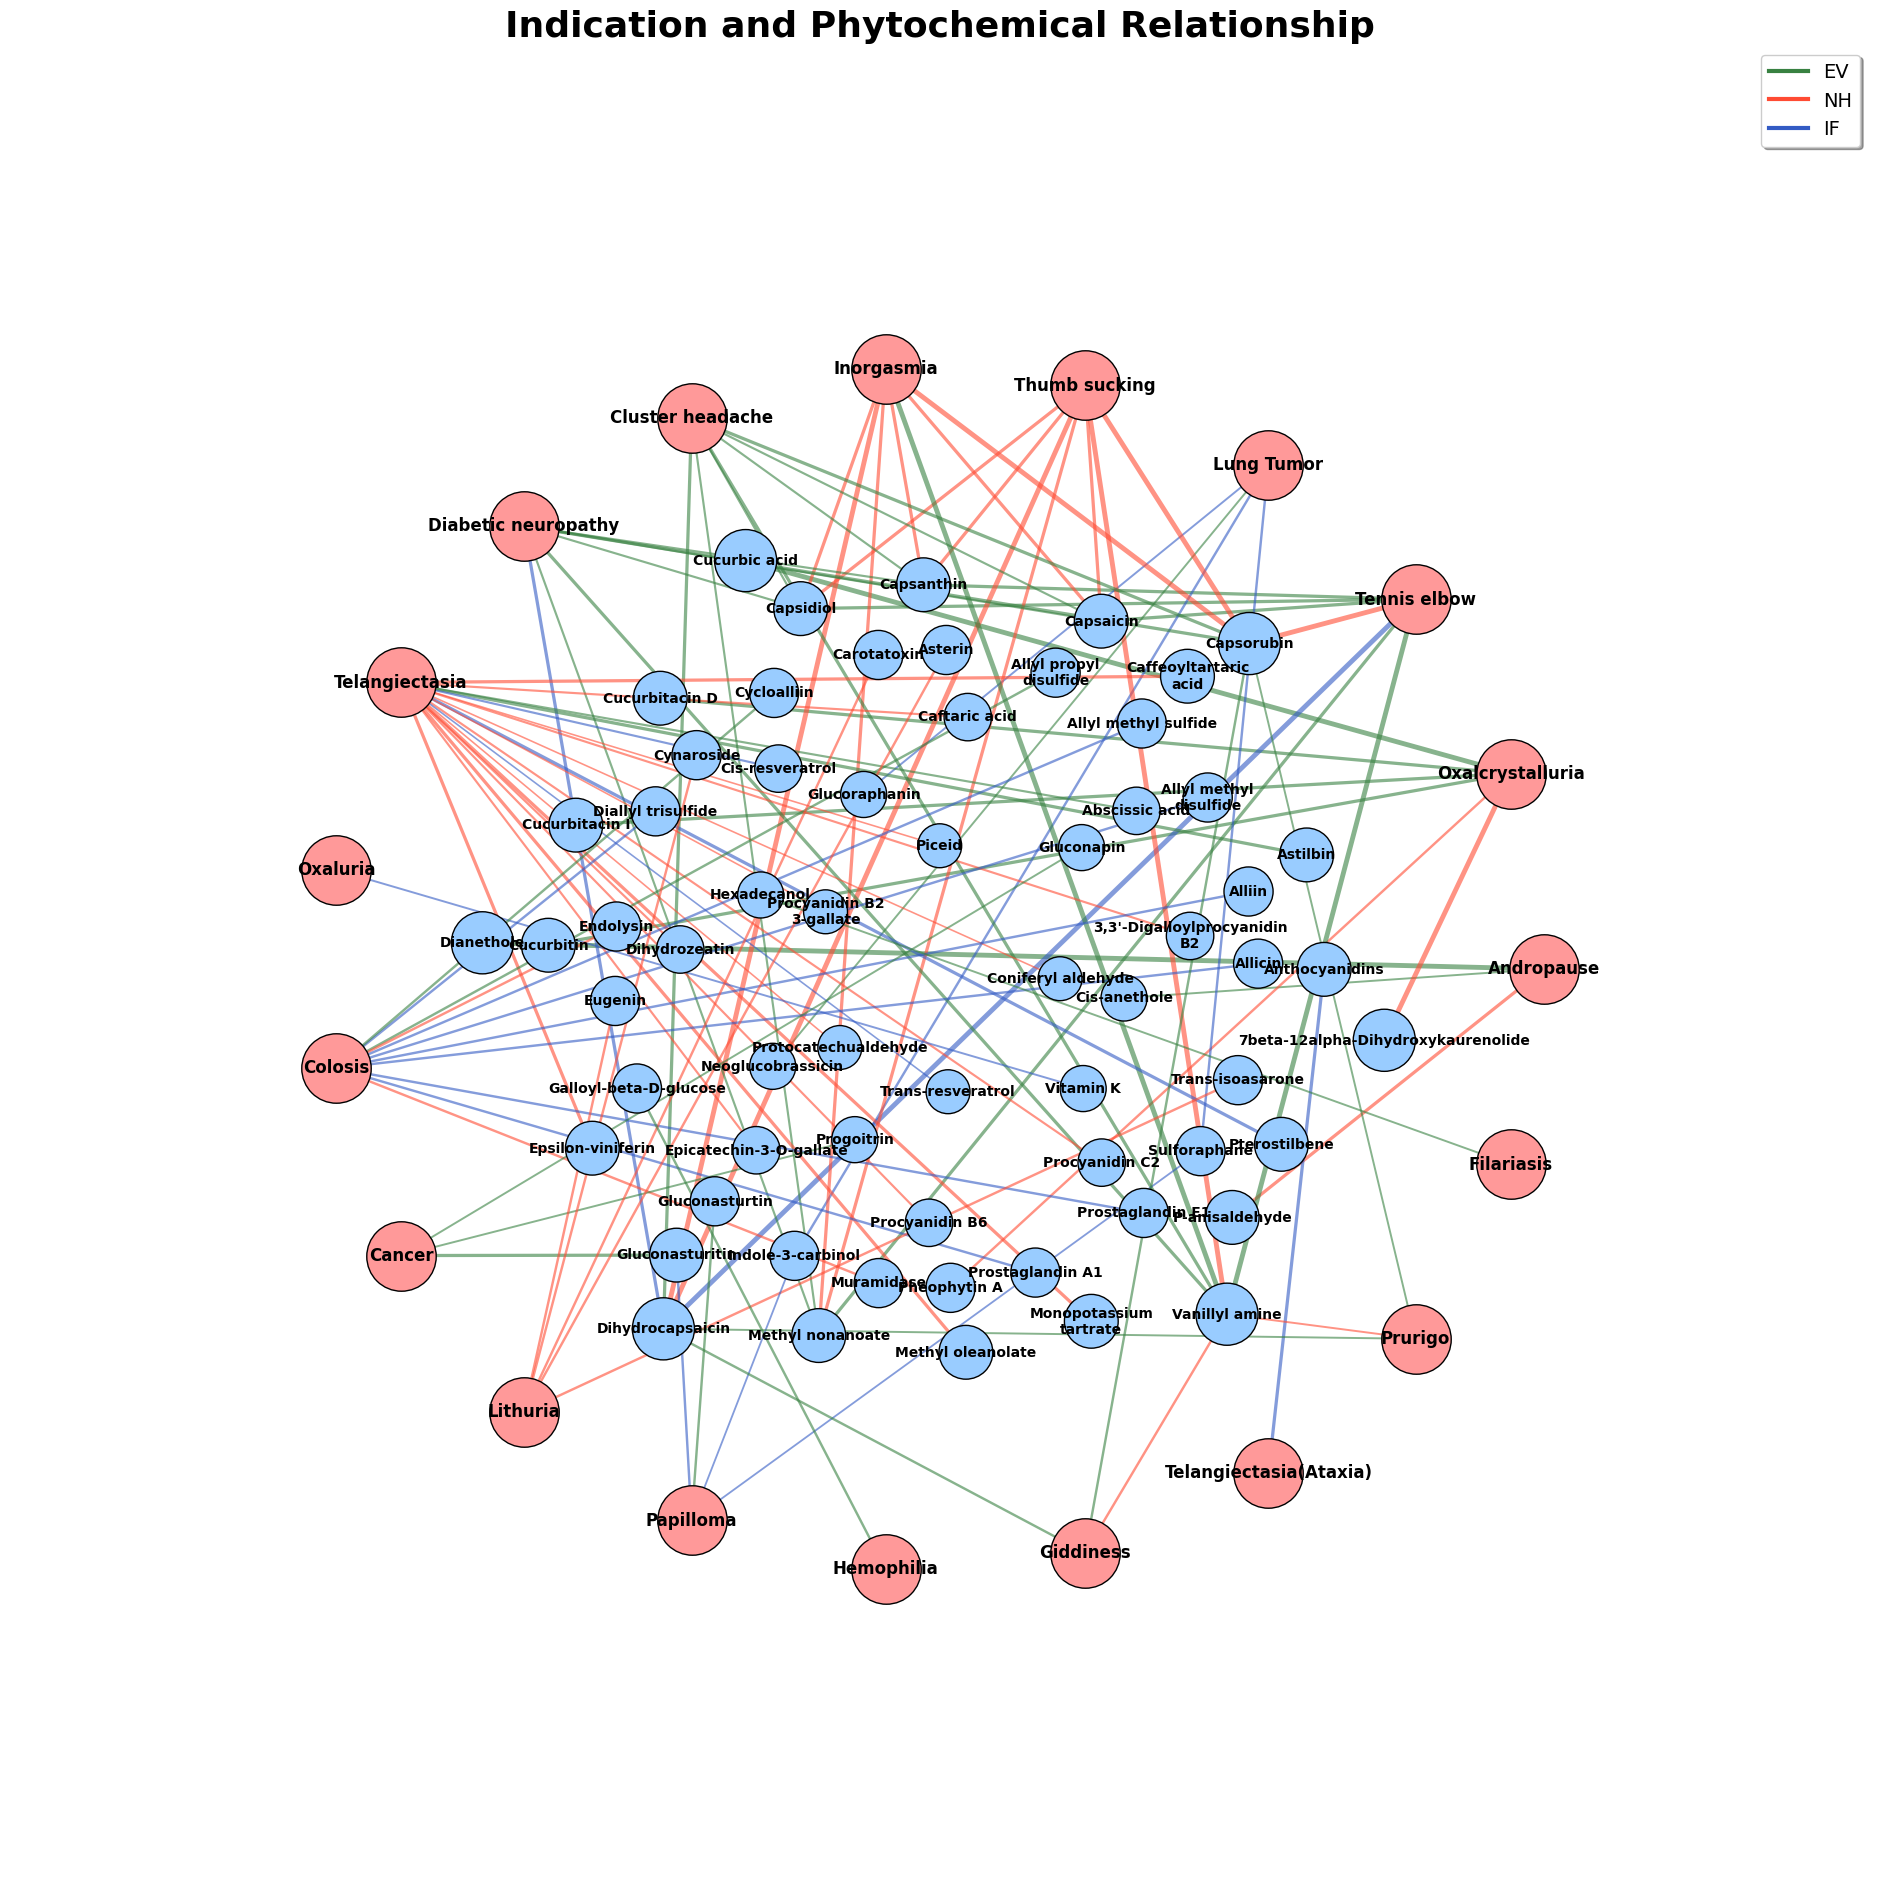

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import textwrap  

data = pd.read_csv('../Data/Supplementary.csv')

data.columns = data.columns.str.strip()

G = nx.Graph()

indications = data['Indication'].unique()
phytochemicals = data['Phytochemical'].unique()
G.add_nodes_from(indications, bipartite=0)
G.add_nodes_from(phytochemicals, bipartite=1)

def get_edge_color(inference):
    color_map = {'EV': '#388141', 'NH': '#ff4b33', 'IF': '#335bc4'}  
    return color_map.get(inference, 'gray')

edges = []
for _, row in data.iterrows():
    edges.append((row['Indication'], row['Phytochemical'], {
        'weight': row['specificity_score'],
        'color': get_edge_color(row['Inference_EV_NH_IF'])
    }))
G.add_edges_from(edges)

phytochemical_scores = data.groupby('Phytochemical')['specificity_score'].max().to_dict()

max_score = max(phytochemical_scores.values())
min_size = 500   # Min
max_size = 2000  # Max
phytochemical_node_sizes = {
    n: min_size + (phytochemical_scores[n] / max_score) * (max_size - min_size) for n in phytochemicals
}

base_radius = 8.5           # radius for the innermost circle
delta_radius = 4.5          # radius increment for each specificity score level
phytochemical_font_size = 10    # for phytochemical labels
indication_font_size = 12        # for indication labels

unique_scores = sorted(set(phytochemical_scores.values()))

score_to_radius = {}
for idx, score in enumerate(unique_scores):
    score_to_radius[score] = base_radius + idx * delta_radius

from collections import defaultdict
score_phytochemicals = defaultdict(list)
for phytochemical, score in phytochemical_scores.items():
    score_phytochemicals[score].append(phytochemical)


plt.figure(figsize=(24, 24)) 

max_phytochemical_radius = max(score_to_radius.values())
indication_radius = max_phytochemical_radius + delta_radius + 6  # offset 

num_indications = len(indications)
angles_indications = np.linspace(0, 2 * np.pi, num_indications, endpoint=False)
positions_indications = {
    indication: (indication_radius * np.cos(angle), indication_radius * np.sin(angle))
    for indication, angle in zip(indications, angles_indications)
}

positions_phytochemicals = {}
np.random.seed(42) 
for score in unique_scores:
    phytochemicals_with_score = score_phytochemicals[score]
    radius = score_to_radius[score]
    num_nodes = len(phytochemicals_with_score)
    # spacing between nodes within each circle
    angles = np.linspace(0, 2 * np.pi, num_nodes, endpoint=False)
    # prevent overlap
    angle_perturbation = np.random.uniform(-np.pi/(num_nodes*2), np.pi/(num_nodes*2), num_nodes)
    angles += angle_perturbation
    for phytochemical, angle in zip(phytochemicals_with_score, angles):
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        positions_phytochemicals[phytochemical] = (x, y)

pos = {**positions_indications, **positions_phytochemicals}

def wrap_text(text, width):
    if ' ' in text:
        return '\n'.join(textwrap.wrap(text, width, break_long_words=False, break_on_hyphens=False))
    else:
        return text

wrapped_labels_indications = {n: wrap_text(n, 20) for n in indications}
wrapped_labels_phytochemicals = {n: wrap_text(n, 20) for n in phytochemicals}

indication_node_size = 2500 

nx.draw_networkx_nodes(
    G, pos, nodelist=indications, node_color='#ff9999', label='Indications',
    node_size=indication_node_size, edgecolors='black', linewidths=1
)
phytochemical_node_sizes_list = [phytochemical_node_sizes[n] for n in phytochemicals]
nx.draw_networkx_nodes(
    G, pos, nodelist=phytochemicals, node_color='#99ccff', label='Phytochemicals',
    node_size=phytochemical_node_sizes_list, edgecolors='black', linewidths=1
)

#edges with increased thickness based on specificity_score
colors = [G[u][v]['color'] for u, v in G.edges()]
weights = [G[u][v]['weight'] * 7 for u, v in G.edges()]  #scaling factor for edge thickness
nx.draw_networkx_edges(
    G, pos, edgelist=list(G.edges()), edge_color=colors, width=weights, alpha=0.6, style='solid'
)

nx.draw_networkx_labels(
    G, pos, labels=wrapped_labels_indications, font_size=indication_font_size,
    font_family="sans-serif", font_weight='bold', verticalalignment='center', horizontalalignment='center'
)
nx.draw_networkx_labels(
    G, pos, labels=wrapped_labels_phytochemicals, font_size=phytochemical_font_size,
    font_family="sans-serif", font_weight='bold', verticalalignment='center', horizontalalignment='center'
)

plt.margins(0.2)

legend_elements = [
    Line2D([0], [0], color='#388141', lw=3, label='EV'),
    Line2D([0], [0], color='#ff4b33', lw=3, label='NH'),
    Line2D([0], [0], color='#335bc4', lw=3, label='IF')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=14, frameon=True, shadow=True)
plt.title("Indication and Phytochemical Relationship", fontsize=26, fontweight='bold')
plt.axis('off') 

plt.savefig('../Figures/indic_phyto_relationships.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
